# Método de Penalidades - SME0212 Otimização Não Linear
# Deandreson Alves - 10145310
# Hiago Vinícius Américo - 11218469

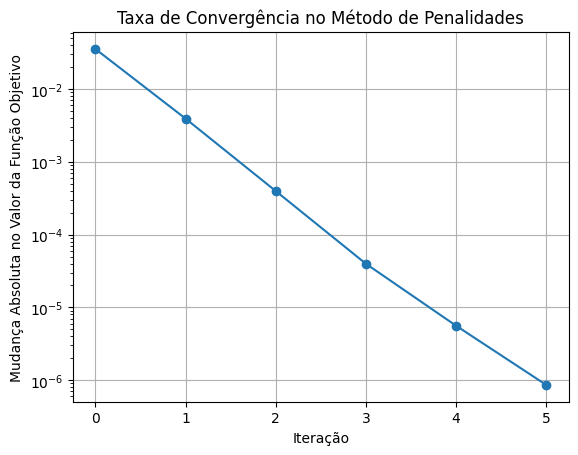

In [ ]:
# @title Texto de título padrão
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Nova função objetivo
def f_complex(x):
    return np.sin(x[0]) * np.cos(x[1]) + (x[0] - 1)**2 + (x[1] - 2)**2

# Nova restrição
def g_complex(x):
    return x[0]**2 + x[1]**2 - 4  # x^2 + y^2 <= 4 (círculo de raio 2)

# Função penalizada ajustada
def penalized_function_complex(x, penalty_weight):
    penalty = max(0, g_complex(x)) ** 2  # Penalidade quadrática para g_complex(x) > 0
    return f_complex(x) + penalty_weight * penalty

# Algoritmo do método de penalidades ajustado
def penalty_method_complex(initial_guess, initial_penalty_weight=1, max_iterations=100, penalty_multiplier=10):
    x_best = initial_guess
    penalty_weight = initial_penalty_weight
    history = []  # Guardar histórico das soluções

    for i in range(max_iterations):
        result = minimize(lambda x: penalized_function_complex(x, penalty_weight), x_best)
        x_best = result.x
        history.append(x_best)

        # Checar se a penalidade ainda está ativa; se não, parar
        if max(0, g_complex(x_best)) == 0 and penalty_weight > 1e5:
            break

        penalty_weight *= penalty_multiplier  # Aumentar o peso da penalidade

    return x_best, history

# Executando o algoritmo ajustado
initial_guess_complex = [0, 0]
optimal_solution_complex, history_complex = penalty_method_complex(initial_guess_complex)

# Preparando os dados para plotar a taxa de convergência
objective_values_complex = [f_complex(point) for point in history_complex]
convergence_rate_complex = np.abs(np.diff(objective_values_complex))

# Plotando a taxa de convergência

plt.plot(convergence_rate_complex, marker='o')
plt.title("Taxa de Convergência no Método de Penalidades")
plt.xlabel("Iteração")
plt.ylabel("Mudança Absoluta no Valor da Função Objetivo")
plt.yscale("log")  # Usar escala logarítmica para melhor visualização
plt.grid(True)
plt.show()



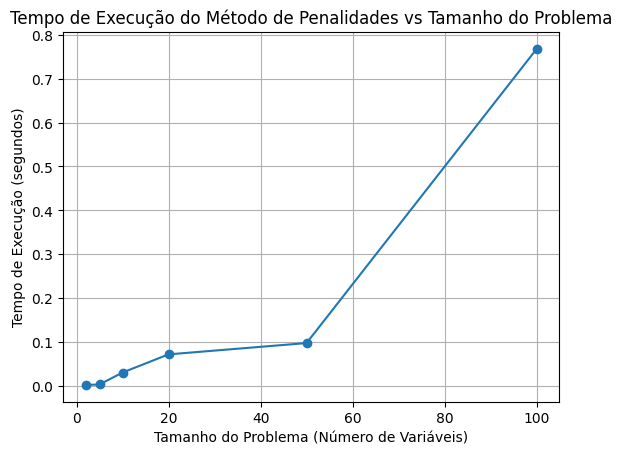

In [ ]:
import numpy as np
import time
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Exemplo de função objetivo (adaptável para diferentes dimensões)
def f_sintetica(x):
    return np.sum((x - np.arange(len(x)))**2)

# Exemplo de restrição (a soma dos elementos deve ser menor que um valor)
def g_sintetica(x, limit):
    return np.sum(x) - limit

# Função para o Método de Penalidades (adaptável para diferentes dimensões)
def penalized_function_sintetica(x, penalty_weight, limit):
    penalty = max(0, g_sintetica(x, limit)) ** 2
    return f_sintetica(x) + penalty_weight * penalty

# Algoritmo de otimização com penalidades
def penalty_method_sintetica(dim, limit, penalty_weight=100, max_iterations=100):
    initial_guess = np.zeros(dim)
    start_time = time.time()
    result = minimize(lambda x: penalized_function_sintetica(x, penalty_weight, limit), initial_guess)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# Análise para diferentes tamanhos de problemas
sizes = [2, 5, 10, 20, 50, 100]  # Exemplo de tamanhos de problema
limit = 10  # Exemplo de limite para a restrição
execution_times = []

for size in sizes:
    result, exec_time = penalty_method_sintetica(size, limit)
    execution_times.append(exec_time)

# Plotando o gráfico dos resultados
plt.plot(sizes, execution_times, marker='o')
plt.title("Tempo de Execução do Método de Penalidades vs Tamanho do Problema")
plt.xlabel("Tamanho do Problema (Número de Variáveis)")
plt.ylabel("Tempo de Execução (segundos)")
plt.grid(True)
plt.show()

